In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd
import math
from matplotlib import pyplot as plt
from shapely import wkt
from shapely.geometry import Point


pd.set_option('display.max_colwidth', None)
plt.rcParams['figure.figsize'] = [10, 5]


In [3]:
# all required imports

import iucn_data
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

animalia_df = iucn_data.get_animalia_df()
historical_df = iucn_data.get_merged_historical_info()
threats_df = iucn_data.get_merged_threats_info()
habitat_df = iucn_data.get_merged_habitat_info()
countries_df = iucn_data.get_merged_country_info()

In [4]:
animalia_df.columns


Index(['scientific_name', 'subspecies', 'rank', 'subpopulation',
       'threatCategory', 'kingdom', 'phylum', 'class', 'order', 'family',
       'genus', 'main_common_name', 'authority', 'published_year',
       'assessment_date', 'category', 'criteria', 'population_trend',
       'marine_system', 'freshwater_system', 'terrestrial_system', 'assessor',
       'reviewer', 'aoo_km2', 'eoo_km2', 'elevation_upper', 'elevation_lower',
       'depth_upper', 'depth_lower', 'errata_flag', 'errata_reason',
       'amended_flag', 'amended_reason'],
      dtype='object')

In [5]:
historical_df.head()

,year,assess_year,code,category
taxonid_iucn,,,,
3,2012,2011,CR,Critically Endangered
3,1996,1996,DD,Data Deficient
3,1994,1994,V,Vulnerable
198783,2012,2011,CR,Critically Endangered
198784,2012,2011,CR,Critically Endangered


In [6]:
threats_df.head()

,code,title,timing,scope,severity,score,invasive
taxonid_iucn,,,,,,,
3,5.3,Logging & wood harvesting,Ongoing,Unknown,Unknown,Unknown,NaN
3,5.3.5,Motivation Unknown/Unrecorded,Ongoing,Unknown,Unknown,Unknown,NaN
198783,4.1,Roads & railroads,Ongoing,Unknown,Unknown,Unknown,NaN
198783,5.3,Logging & wood harvesting,Ongoing,Unknown,Unknown,Unknown,NaN
198783,5.3.5,Motivation Unknown/Unrecorded,Ongoing,Unknown,Unknown,Unknown,NaN


In [7]:
habitat_df.head()

,code,habitat,suitability,season,majorimportance
taxonid_iucn,,,,,
3,1.6,Forest - Subtropical/Tropical Moist Lowland,Suitable,NaN,Yes
198783,1.6,Forest - Subtropical/Tropical Moist Lowland,Suitable,NaN,Yes
198784,1.6,Forest - Subtropical/Tropical Moist Lowland,Suitable,NaN,Yes
198785,1.6,Forest - Subtropical/Tropical Moist Lowland,Suitable,NaN,Yes
198786,1.6,Forest - Subtropical/Tropical Moist Lowland,Suitable,NaN,Yes


In [8]:
countries_df["code"]

taxonid_iucn
3           PW
198783      PW
198784      PW
198785      PW
198786      PW
            ..
22698398    HM
8826        AD
61513       AD
22695180    AD
44712223    AD
Name: code, Length: 20152, dtype: object

## By Climate Zone

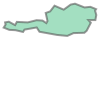

In [9]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")
world.loc["AUT", 'geometry']

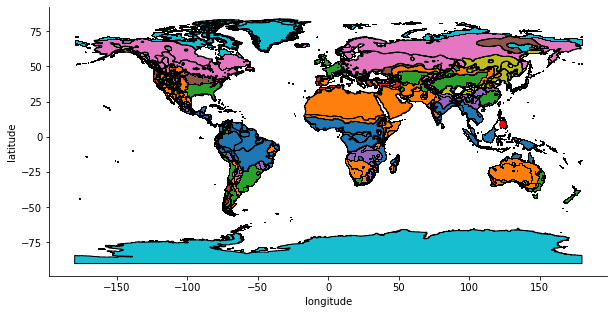

In [10]:
# Import climate zone data. 
zone_df = pd.read_csv("../data/climate_zone/koppen_geiger_climate_zones.csv")

main_groups = {"A": "A (Tropical)", 
               "B": "B (Arid)", 
               "C": "C (Temperate)", 
               "D": "D (Continental)", 
               "E": "E (Polar)"}

seasonal_temperature_groups = {"A": {"f": "f (Rainforest)",
                                    "m": "m (Monsoon)",
                                    "w": "w (Savanna, Dry winter)",
                                    "s": "s (Savanna, Dry summer)"},
                               "B": {"W": "W (Desert)",
                                     "S": "S (Steppe)"},
                               "C": {"w": "w (Dry winter)",
                                     "f": "f (No dry season)",
                                     "s": "s (Dry summer)"},
                               "D": {"w": "w (Dry winter)",
                                     "f": "f (No dry season)",
                                     "s": "s (Dry summer)"},
                               "E": {"T": "T (Tundra)",
                                    "F": "Eternal frost(ice cap))"}
                              }

heat_groups = {"B": {"h": "h (Hot)",
                      "k": "k (Cold)"},
              "C": {"a": "a (Hot summer)",
                   "b": "b (Warm summer)",
                   "c": "c (Cold summer)"},
              "D": {"a": "a (Hot summer)",
                   "b": "b (Warm summer)",
                   "c": "c (Cold summer)",
                   "d": "d (Very cold winter)"}}
                               

# Map 1st, 2nd and 3rd climate zone group based on column 'climate' 
# Add groups as columns to enable analysis
for index, group_entry in zone_df["climate"].iteritems():
    zone_df.loc[index, "main group"] = main_groups[group_entry[0]]
    zone_df.loc[index, "seasonal precipitation group"] = seasonal_temperature_groups[group_entry[0]][group_entry[1]]
    if len(group_entry.split(" ")[0]) == 3:
        zone_df.loc[index, "heat group"] = heat_groups[group_entry[0]][group_entry[2]]
    else: zone_df.loc[index, "heat group"] = np.nan
        
zone_df.drop(columns=["climate"])
zone_df['geometry'] = zone_df['geometry'].apply(wkt.loads)
gdf = gpd.GeoDataFrame(zone_df)

# Plot climate zones
fig, gax = plt.subplots(figsize=(10,10))
gdf.plot(ax=gax, column="climate", edgecolor="black")
gax.scatter(123.25, 9.2667, color="red")

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()


In [11]:
animalia = pd.read_csv("../data/iucn_api_data/animalia.csv")
location = pd.read_csv("../data/climate_zone/loc_df2.csv", index_col=0)
animalia_loc = pd.merge(animalia, location, how="outer")
animalia_loc

,taxonid_iucn,scientific_name,subspecies,rank,subpopulation,threatCategory,kingdom,phylum,class,order,...,elevation_upper,elevation_lower,depth_upper,depth_lower,errata_flag,errata_reason,amended_flag,amended_reason,decimalLongitude,decimalLatitude
0,3,Aaadonta angaurana,NaN,NaN,NaN,CR,ANIMALIA,MOLLUSCA,GASTROPODA,STYLOMMATOPHORA,...,200.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,198783,Aaadonta constricta ssp. babelthuapi,babelthuapi,ssp.,NaN,CR,ANIMALIA,MOLLUSCA,GASTROPODA,STYLOMMATOPHORA,...,200.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,198784,Aaadonta constricta ssp. constricta,constricta,ssp.,NaN,CR,ANIMALIA,MOLLUSCA,GASTROPODA,STYLOMMATOPHORA,...,200.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,198785,Aaadonta constricta ssp. komakanensis,komakanensis,ssp.,NaN,CR,ANIMALIA,MOLLUSCA,GASTROPODA,STYLOMMATOPHORA,...,200.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,198786,Aaadonta fuscozonata ssp. depressa,depressa,ssp.,NaN,CR,ANIMALIA,MOLLUSCA,GASTROPODA,STYLOMMATOPHORA,...,200.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9953,22714043,Zosterops saypani,NaN,NaN,NaN,EN,ANIMALIA,CHORDATA,AVES,PASSERIFORMES,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9954,22713957,Zosterops silvanus,NaN,NaN,NaN,EN,ANIMALIA,CHORDATA,AVES,PASSERIFORMES,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9955,22716237,Zosterornis nigrorum,NaN,NaN,NaN,EN,ANIMALIA,CHORDATA,AVES,PASSERIFORMES,...,1600.0,950.0,NaN,NaN,NaN,NaN,NaN,NaN,123.25,9.2667
9956,196970,Zygaspis ferox,NaN,NaN,NaN,EN,ANIMALIA,CHORDATA,REPTILIA,SQUAMATA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# Check if POINT (long/lat) in zone. Returns boolean
def map_coordinates(data, zone_df):
    
    climate_series = []

    for j, point in data.iterrows():
        for i, zone in zone_df.iterrows():
            if Point(data.iloc[j]["decimalLongitude"], data.iloc[j]["decimalLatitude"]).within(zone_df.iloc[i]["geometry"]):
                climate_series.append(zone_df.iloc[i]["climate"])
        if len(climate_series) == j:
            climate_series.append(float("nan"))

    return climate_series


climate_series = map_coordinates(animalia_loc[animalia_loc.decimalLatitude.notnull()].reset_index(drop=True), zone_df)

In [31]:
climate_animalia = animalia_loc[animalia_loc.decimalLatitude.notnull()]
climate_animalia["climate"] = climate_series
climate_animalia = climate_animalia[["taxonid_iucn", "climate"]]
animalia_complete = pd.merge(animalia, climate_animalia, how="outer")
animalia_complete.to_csv("../data/climate_zone/animalia_mapped.csv", index=False)

<ipython-input-31-b03f4e819f32>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climate_animalia["climate"] = climate_series


In [22]:
complete.to_csv("../data/climate_zone/animalia_mapped.csv", index=False)

In [92]:
mapped_animalia_loc3 = map_coordinates(animalia_loc[animalia_loc.decimalLatitude.notnull()].reset_index(drop=True), zone_df)

C:\Users\thoma\miniconda3\lib\site-packages\pandas\core\series.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cacher_needs_updating = self._check_is_chained_assignment_possible()


In [86]:
#animalia_loc[~animalia[""]].iloc[0:10]
# non_land = ["ACTINOPTERYGII", "MALACOSTRACA", "CHONDRICHTHYES", "BIVALVIA", "ANTHOZOA", "BRANCHIOPODA", ]
# animalia_loc["class"].value_counts()
#mapped_animalia_loc
for i, zone in zone_df.iterrows():
    if Point(123.25, 9.2667).within(zone_df.iloc[i]["geometry"]):
        print(zone_df.iloc[i]["geometry"])


,taxonid_iucn,scientific_name,subspecies,rank,subpopulation,threatCategory,kingdom,phylum,class,order,...,elevation_lower,depth_upper,depth_lower,errata_flag,errata_reason,amended_flag,amended_reason,decimalLongitude,decimalLatitude,climate
0,18,Abrocoma boliviensis,NaN,NaN,NaN,CR,ANIMALIA,CHORDATA,MAMMALIA,RODENTIA,...,1800.0,NaN,NaN,NaN,NaN,NaN,NaN,-64.483300,-17.900000,NaN
1,195,Achatinella pupukanioe,NaN,NaN,NaN,CR,ANIMALIA,MOLLUSCA,GASTROPODA,STYLOMMATOPHORA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-157.882181,21.405552,NaN
2,232,Acipenser gueldenstaedtii,NaN,NaN,NaN,CR,ANIMALIA,CHORDATA,ACTINOPTERYGII,ACIPENSERIFORMES,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.900000,37.200000,NaN
3,230,Acipenser sturio,NaN,NaN,NaN,CR,ANIMALIA,CHORDATA,ACTINOPTERYGII,ACIPENSERIFORMES,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4.737883,50.272691,NaN
4,22714826,Acrocephalus rimitarae,NaN,NaN,NaN,CR,ANIMALIA,CHORDATA,AVES,PASSERIFORMES,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-152.797000,-22.652000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2771,65524357,Zoosphaerium arborealis,NaN,NaN,NaN,EN,ANIMALIA,ARTHROPODA,DIPLOPODA,SPHAEROTHERIIDA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.845000,-22.211700,NaN
2772,65525982,Zoosphaerium tainkintana,NaN,NaN,NaN,EN,ANIMALIA,ARTHROPODA,DIPLOPODA,SPHAEROTHERIIDA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.616667,-13.255000,NaN
2773,22714082,Zosterops flavus,NaN,NaN,NaN,EN,ANIMALIA,CHORDATA,AVES,PASSERIFORMES,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107.000000,-6.666700,NaN
2774,22716237,Zosterornis nigrorum,NaN,NaN,NaN,EN,ANIMALIA,CHORDATA,AVES,PASSERIFORMES,...,950.0,NaN,NaN,NaN,NaN,NaN,NaN,123.250000,9.266700,NaN


In [75]:
zone_df["geometry"]

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [ ]:
animalia = pd.read_csv("../data/iucn_api_data/animalia.csv")
species_list = list(animalia["scientific_name"])
len(species_list)

9958

## By Country
### % of Forest over time

In [ ]:
# Import data 

forest_df = pd.read_csv("../data/country/API_AG.LND.FRST.ZS_DS2_en_csv_v2_3469441.csv", quotechar = '"', skiprows=4)
forest_df = forest_df.set_index("Country Name")

# Transpose data such to columns 'Country Name' and id 'Year'
years = [x for x in forest_df.columns if re.match(r'[0-9]',x)]
ts = forest_df[years].T
# ts.plot(legend=False)

greatest_decrease = 0
greatest_increase = 0

# Determine total difference between last and first record  
for i, row in ts.iteritems():
    
    try:
        diff = ts.loc[str(row.last_valid_index()), i] - ts.loc[str(row.first_valid_index()), i] 
        ts.loc["Diff", i] = diff 
    except KeyError:
        ts.loc["Diff", i] = np.nan
    
    if diff > greatest_increase:
        greatest_increase = diff
        gi_country = i
        
    if diff < greatest_decrease:
        greatest_decrease = diff
        gd_country = i
        
print("Greatest increase: ", gi_country, " with ", greatest_increase, " percentage points")
print("Greatest decrease: ", gd_country, " with ", greatest_decrease, " percentage points")

NameError: name 're' is not defined